# Exploracíon del dataset
_Santiago Prieto Núñez_

#### Objetivo
En este Jupiter Notebook explporaremos la forma de los datos de distintos dataset
obteniendo su distribución de tamaño de imágen, número de canales de la imágen,
tipo de etiquetado de la misma, ya que podemos tener desde máscaras con la 
localización del pólipo a sencillas etiquetas y cantidad de imágenes de tipo WLI
o NBI. o más tipos si los hubiera.

Los datasets explorados son los siguientes:
- Piccolo Dataset

## Piccolo dataset

En este dataset es el que usamos de base

Este dataset clasifica la información usando:
- Máscara binaria
- Metadatos clínicos

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import ImageDatasetProcessor as idp

# paths del dataset
paths_polyp_img = [
    ("piccolo_dataset/test/polyps", "polyp", "test"), 
    ("piccolo_dataset/train/polyps", "polyp", "train"), 
    ("piccolo_dataset/validation/polyps", "polyp", "validation")
    ]

paths_mask_img = [
    ("piccolo_dataset/test/masks", "mask", "test"), 
    ("piccolo_dataset/train/masks", "mask", "train"), 
    ("piccolo_dataset/validation/masks", "mask", "validation")
    ]

paths_void_img = [
    ("piccolo_dataset/test/void", "void", "test"), 
    ("piccolo_dataset/train/void", "void", "train"), 
    ("piccolo_dataset/validation/void", "void", "validation")
    ]

paths = paths_polyp_img + paths_mask_img + paths_void_img

# inicializamos el dataset con su nombre y fichero de formatos de imagen
dt_Piccolo = idp(dataset_name="Piccolo", 
                     format_doc="piccolo_dataset/listado_WL-NBI PICCOLO.txt",
                     target_resolution=(854, 480))

for path in paths:
    dt_Piccolo.load_dataset(path[0], path[1], path[2])

FileNotFoundError: [Errno 2] No such file or directory: 'piccolo_dataset/listado_WL-NBI PICCOLO.txt'

In [194]:
dt_Piccolo.print_summary()

Total imágenes:
	- Polyp: 3433
	- Mask: 3433
	- Void: 3433
Composición del dataset:
Formatos:
	WL: 2108	NBI: 1302	WLI: 23

Función:
	test: 333	train: 2203	validation: 897

Resoluciónes: total distintas resoluciones 2
	854x480: 1972	1920x1080: 1461

Canales:
	3_polyp: 3433	3_mask: 3433	3_void: 3433

Volumen medio de los pólipos respecto a la imagen:	20.195122875106236%


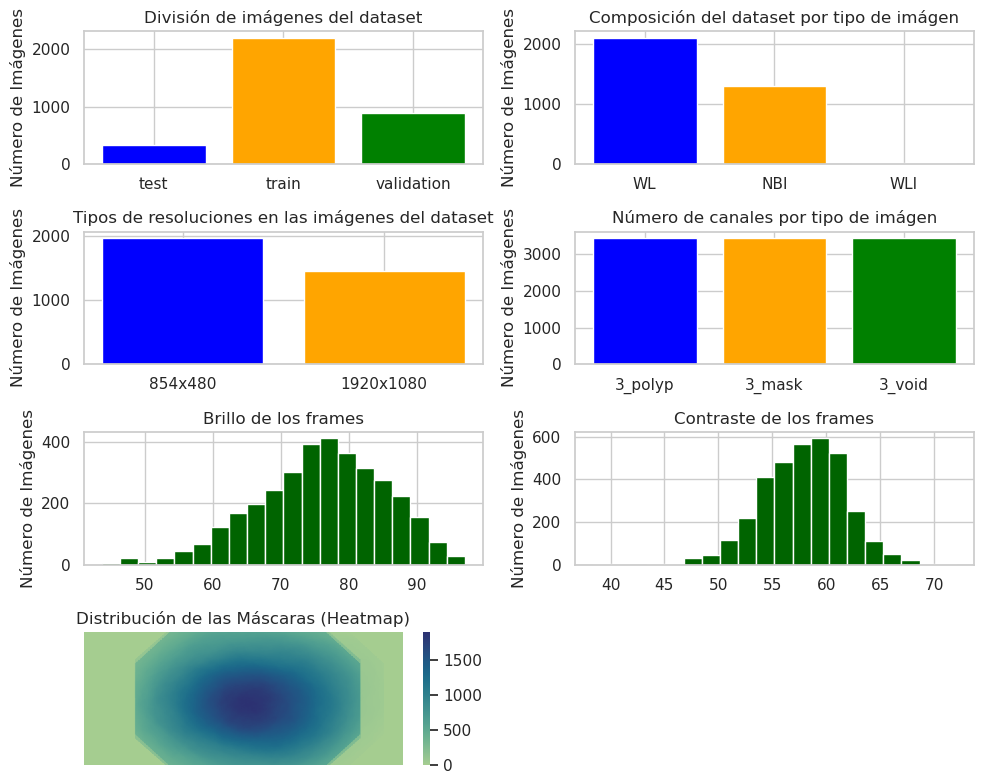

In [195]:
dt_Piccolo.graph_summmary()

## Kvasir-Seg

Este dataset clasifica los polipos con:
- Máscaras binarias
- Bounding boxes

In [196]:
# paths del dataset
paths_polyp_img = [("Kvasir-SEG/images", "polyp", "train", "WLI")]

paths_mask_img = [("Kvasir-SEG/masks", "mask", "train", "WLI")]

paths = paths_polyp_img + paths_mask_img

dt_Kevasir_SEG = Dataset()

# cargamos todos los paths
for path in paths:
    dt_Kevasir_SEG.load_dataset(path[0], path[1], path[2])

dt_Kevasir_SEG.print_summary()

Directorio "Kvasir-SEG/images" cargado con éxito
Directorio "Kvasir-SEG/masks" cargado con éxito
Total imágenes:
	- Polyp: 1000
	- Mask: 1000
	- Void: 0
Composición del dataset:
Formatos:
	UNKNOWN: 1000

Función:
	train: 1000

Resoluciónes: total distintas resoluciones 333
	622x529: 56	1348x1070: 17	619x529: 4	622x528: 53	617x528: 3	626x547: 66	621x530: 11	1214x1019: 1	570x531: 19	622x530: 78	611x530: 3	626x546: 61	622x531: 50	623x529: 8	609x546: 1	620x547: 1	594x528: 2	624x546: 1	607x530: 2	616x528: 6	571x530: 14	481x530: 1	560x529: 1	616x530: 7	621x528: 10	605x510: 1	623x528: 14	519x511: 1	459x526: 1	600x529: 2	622x511: 2	480x531: 1	619x528: 5	615x528: 2	622x547: 1	601x528: 2	549x530: 1	570x530: 33	536x530: 1	615x529: 3	577x505: 1	616x529: 4	612x546: 1	621x531: 9	590x529: 1	627x547: 5	617x513: 1	566x531: 1	619x547: 2	613x547: 1	572x547: 2	576x547: 1	570x521: 1	562x502: 1	568x529: 2	621x529: 12	611x529: 1	525x531: 1	605x529: 2	587x530: 2	490x531: 1	571x531: 10	576x530: 3	530x528: 1	59

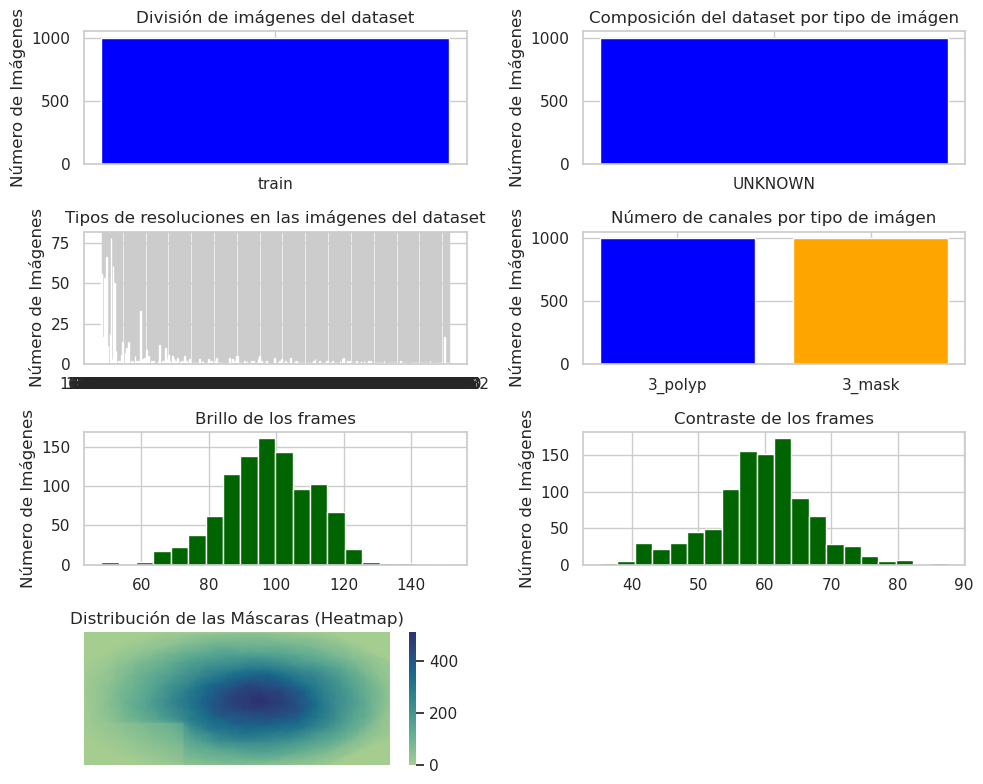

In [197]:
dt_Kevasir_SEG.graph_summmary()

## PolypDB
Este dataset se caracteriza por ser bastante completo y dar imágenes en formatos
muy distintos de imágen con los siguientes métodos para clasificar las imágenes:
- Máscara binaria

_Apuntar que cargo tan solo los datos de modality wise_

In [198]:
# paths del dataset
paths_polyp_img = [
    ("PolypDB/PolypDB_modality_wise/BLI/images", "polyp", "train", "BLI"),
    ("PolypDB/PolypDB_modality_wise/FICE/images", "polyp", "train", "FICE"),
    ("PolypDB/PolypDB_modality_wise/LCI/images", "polyp", "train", "LCI"),
    ("PolypDB/PolypDB_modality_wise/NBI/images", "polyp", "train", "NBI"),
    ("PolypDB/PolypDB_modality_wise/WLI/images", "polyp", "train", "WLI")]

paths_mask_img = [
    ("PolypDB/PolypDB_modality_wise/BLI/masks", "mask", "train", "BLI"),
    ("PolypDB/PolypDB_modality_wise/FICE/masks", "mask", "train", "FICE"),
    ("PolypDB/PolypDB_modality_wise/LCI/masks", "mask", "train", "LCI"),
    ("PolypDB/PolypDB_modality_wise/NBI/masks", "mask", "train", "NBI"),
    ("PolypDB/PolypDB_modality_wise/WLI/masks", "mask", "train", "WLI")]

paths = paths_polyp_img + paths_mask_img

dt_PolypDB = Dataset()

# cargamos todos los paths
for path in paths:
    dt_PolypDB.load_dataset(path[0], path[1], path[2], path[3])

dt_PolypDB.print_summary()

Error cargando PolypDB/PolypDB_modality_wise/BLI/images/.DS_Store
Directorio "PolypDB/PolypDB_modality_wise/BLI/images" cargado con éxito
Error cargando PolypDB/PolypDB_modality_wise/FICE/images/.DS_Store
Directorio "PolypDB/PolypDB_modality_wise/FICE/images" cargado con éxito
Error cargando PolypDB/PolypDB_modality_wise/LCI/images/.DS_Store
Directorio "PolypDB/PolypDB_modality_wise/LCI/images" cargado con éxito
Directorio "PolypDB/PolypDB_modality_wise/NBI/images" cargado con éxito
Directorio "PolypDB/PolypDB_modality_wise/WLI/images" cargado con éxito
Error cargando PolypDB/PolypDB_modality_wise/BLI/masks/.DS_Store
Directorio "PolypDB/PolypDB_modality_wise/BLI/masks" cargado con éxito
Error cargando PolypDB/PolypDB_modality_wise/FICE/masks/.DS_Store
Directorio "PolypDB/PolypDB_modality_wise/FICE/masks" cargado con éxito
Directorio "PolypDB/PolypDB_modality_wise/LCI/masks" cargado con éxito
Directorio "PolypDB/PolypDB_modality_wise/NBI/masks" cargado con éxito
Directorio "PolypDB/Poly

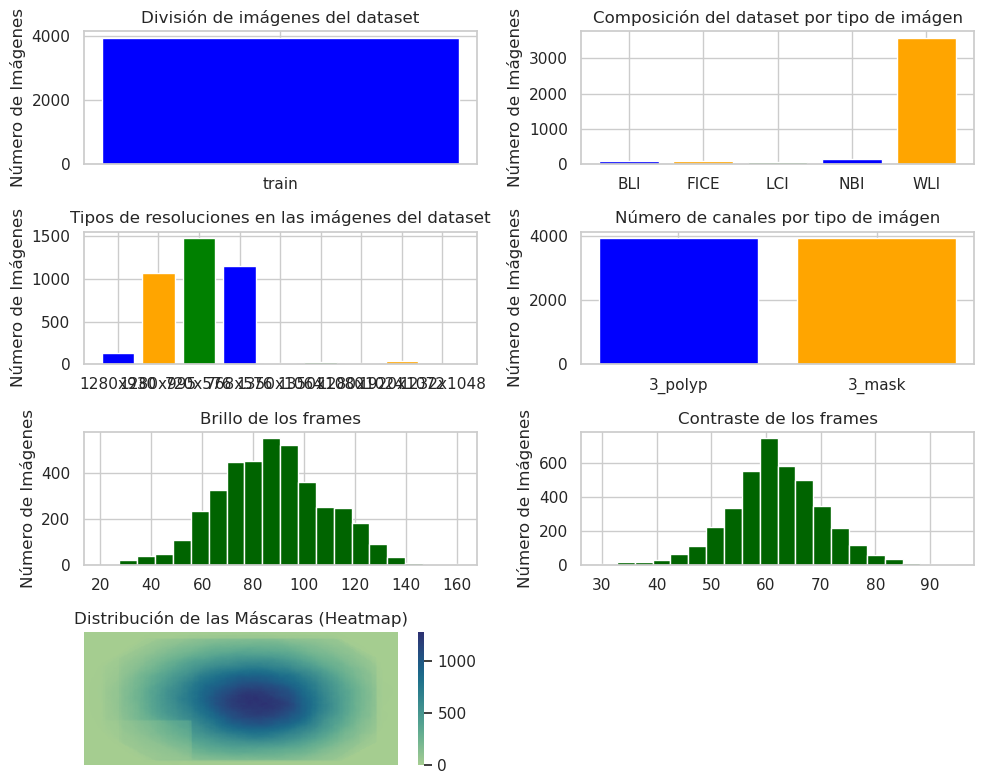

In [199]:
dt_PolypDB.graph_summmary()